In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sys
from scipy.stats import norm

sys.path.insert(0, '../')
from sa_utils import append_files, load_dict

In [2]:
plt.style.use('seaborn')
plt.style.use('seaborn-colorblind')

In [3]:
dict_paths = append_files('Alt_SFRs/', ext='pkl', ret_path=True)
dict_list = [load_dict(path) for path in dict_paths]
sfr_df = pd.DataFrame(dict_list)

In [4]:
sfr_df

,filepath,filename,mangaid,z,d_mpc,d_kpc,d_m,delta,spax_area,map_shape,...,avg_nsp_76_sfr,sig_avg_nsp_76_sfr,tot_sp_77_sfr,sig_tot_sp_77_sfr,tot_nsp_77_sfr,sig_tot_nsp_77_sfr,avg_sp_77_sfr,sig_avg_sp_77_sfr,avg_nsp_77_sfr,sig_avg_nsp_77_sfr
0,/home/sshamsi/sas/mangawork/manga/sandbox/gala...,1-79770_91_14714258.fits.gz,1-79770,0.054772,234.574609,234574.608806,7.238216e+24,4.604474e+08,0.323334,"(62, 62)",...,0.008657,0.000688,NaN,NaN,1.116934,0.085993,NaN,NaN,0.009543,0.000735
1,/home/sshamsi/sas/mangawork/manga/sandbox/gala...,1-585579_127_14741238.fits.gz,1-585579,0.034794,149.014522,149014.522250,4.598108e+24,1.858126e+08,0.130481,"(42, 42)",...,0.021061,0.000291,0.161336,0.003509,1.510689,0.020692,0.026308,0.000572,0.021089,0.000289
2,/home/sshamsi/sas/mangawork/manga/sandbox/gala...,1-415476_61_14730347.fits.gz,1-415476,0.033650,144.114517,144114.517310,4.446909e+24,1.737935e+08,0.122041,"(54, 54)",...,0.008530,0.000240,0.081526,0.003247,0.658076,0.018265,0.020243,0.000806,0.008628,0.000239
3,/home/sshamsi/sas/mangawork/manga/sandbox/gala...,1-93598_127_14715143.fits.gz,1-93598,0.021498,92.070118,92070.118326,2.840987e+24,7.093416e+07,0.049811,"(72, 72)",...,0.002172,0.000044,0.001656,0.000186,0.271697,0.005519,0.002374,0.000266,0.002172,0.000044
4,/home/sshamsi/sas/mangawork/manga/sandbox/gala...,1-637279_91_14744317.fits.gz,1-637279,0.091555,392.105836,392105.836492,1.209912e+25,1.286544e+09,0.903434,"(62, 62)",...,0.001487,0.000132,NaN,NaN,1.868413,0.164286,NaN,NaN,0.001457,0.000128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1477,/home/sshamsi/sas/mangawork/manga/sandbox/gala...,1-36919_61_14710990.fits.gz,1-36919,0.045776,196.045423,196045.423435,6.049330e+24,3.216114e+08,0.225841,"(52, 52)",...,0.015361,0.000201,0.008039,0.000816,4.069339,0.053313,0.017798,0.001806,0.015361,0.000201
1478,/home/sshamsi/sas/mangawork/manga/sandbox/gala...,1-284292_91_14723704.fits.gz,1-284292,0.028765,123.194571,123194.571316,3.801387e+24,1.269992e+08,0.089181,"(62, 62)",...,0.024121,0.000238,NaN,NaN,2.494808,0.024446,NaN,NaN,0.024475,0.000240
1479,/home/sshamsi/sas/mangawork/manga/sandbox/gala...,1-392972_127_14729167.fits.gz,1-392972,0.021902,93.799921,93799.920809,2.894363e+24,7.362460e+07,0.051700,"(74, 74)",...,0.014678,0.000138,0.079060,0.002098,1.409934,0.013280,0.023526,0.000624,0.014678,0.000138
1480,/home/sshamsi/sas/mangawork/manga/sandbox/gala...,1-252619_127_14722210.fits.gz,1-252619,0.028750,123.127332,123127.332150,3.799312e+24,1.268607e+08,0.089084,"(74, 74)",...,0.009138,0.000112,0.005605,0.000232,1.056942,0.012727,0.012584,0.000521,0.009431,0.000114


In [5]:
thresholds = [(x, y) for x in range(1, 8) for y in range(1, 8)]

In [6]:
for Tsp, Tnsp in thresholds:
    sfr_df['pc_tot_sp_{Tsp}{Tnsp}_sfr'.format(Tsp=Tsp, Tnsp=Tnsp)] = 100 * sfr_df['tot_sp_{Tsp}{Tnsp}_sfr'.format(Tsp=Tsp, Tnsp=Tnsp)] / sfr_df['tot_sfr']

In [7]:
odd_thresholds = [(x, y) for x in range(1, 8, 2) for y in range(1, 8, 2)]

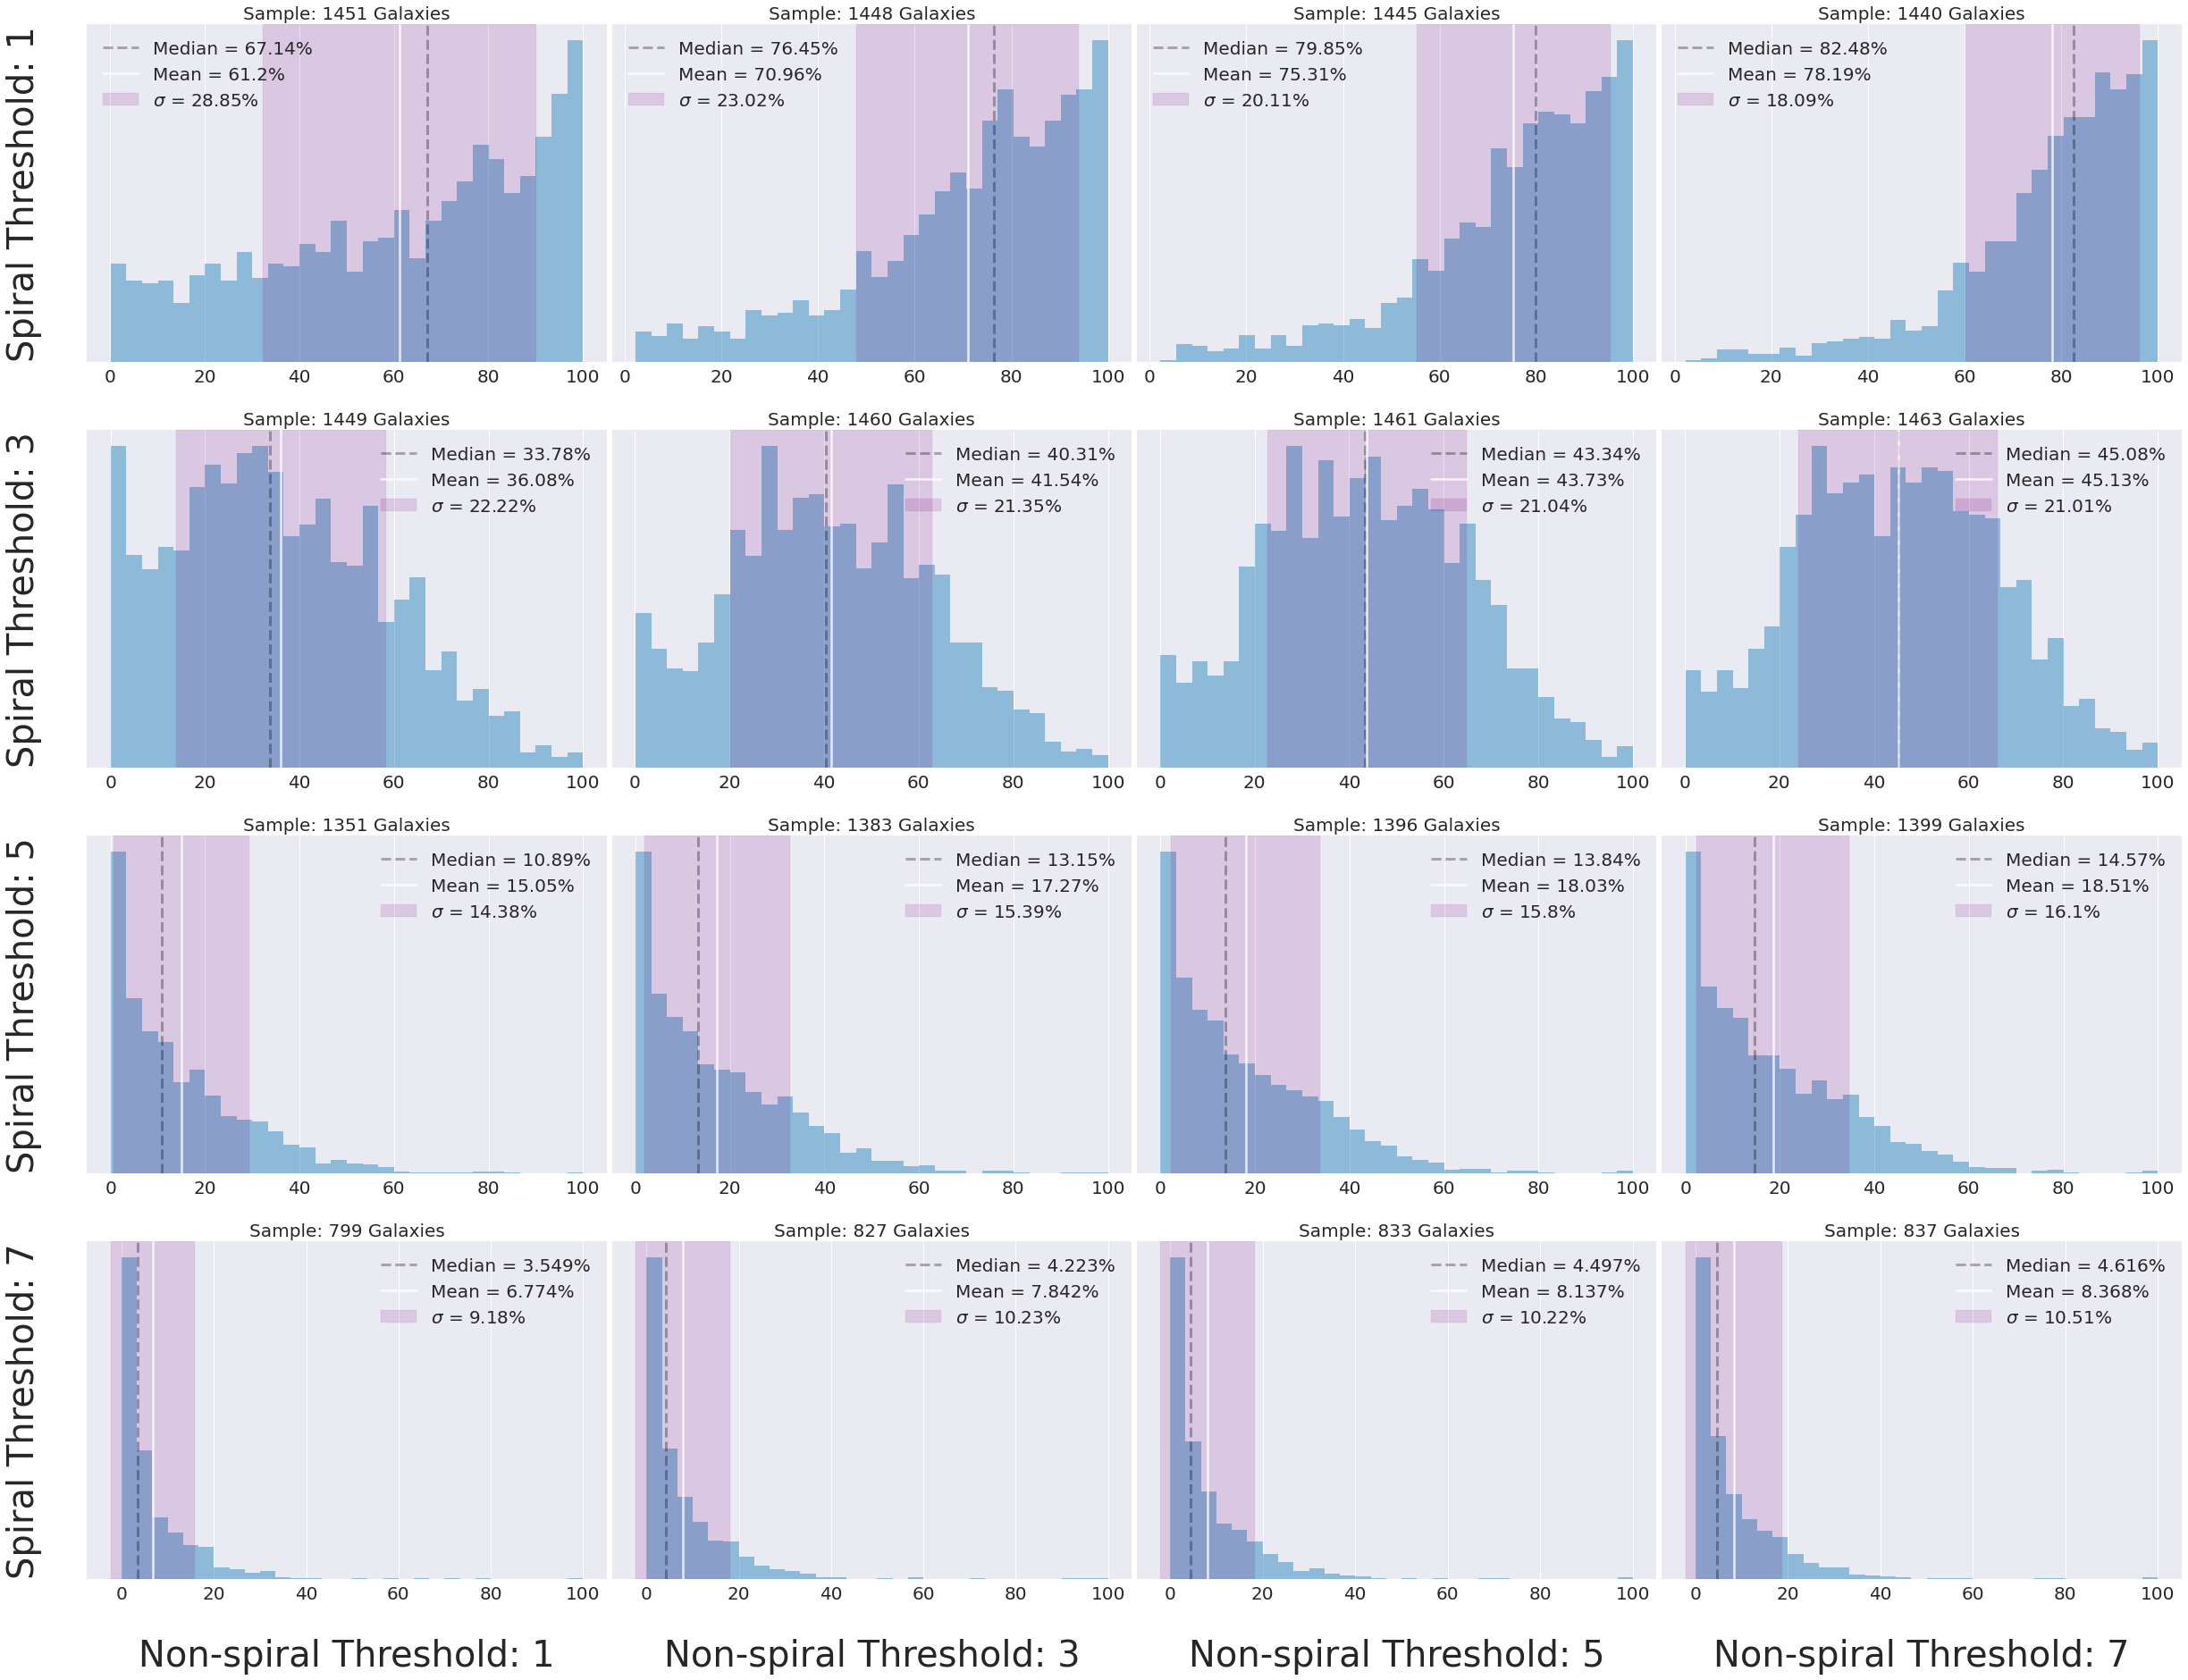

In [8]:
fig, axes = plt.subplots(4, 4, figsize=(42, 32))

for i in range(4):
    for j in range(4):
        Tsp, Tnsp = odd_thresholds[i * 4 + j]
        col_name = 'pc_tot_sp_{Tsp}{Tnsp}_sfr'.format(Tsp=Tsp, Tnsp=Tnsp)
        filtered_df = sfr_df
        filtered_df = filtered_df[filtered_df[col_name] <= 100]
        series = filtered_df[col_name]
        n, b, p = axes[i, j].hist(series, bins=30, alpha=0.4, density=True)
        axes[i, j].tick_params(axis="x", labelsize=20)
        axes[i, j].set_yticks([])
        
        mean_series = series.mean()
        median_series = series.median()
        stdv_series = series.std()
        
        axes[i, j].axvline(median_series, linestyle='--', linewidth=3, alpha=0.3, color='k',
                           label='Median = {:.4}%'.format(median_series))
        axes[i, j].axvline(mean_series, linestyle='-', linewidth=2.5, alpha=0.8, color='white',
                           label='Mean = {:.4}%'.format(mean_series))
        axes[i, j].axvspan(mean_series - stdv_series, mean_series + stdv_series, alpha=0.15, color='purple',
                           label='$\sigma$ = {:.4}%'.format(stdv_series))
        
        axes[i, j].set_title('Sample: {} Galaxies'.format(len(series)), fontsize=20)
        axes[i, j].legend(fontsize=20)

        
for i in range(4):
    axes[3, i].set_xlabel('Non-spiral Threshold: ' + str(i * 2 + 1), size=40, labelpad=40)
    
for i in range(4):
    axes[i, 0].set_ylabel('Spiral Threshold: ' + str(i * 2 + 1), size=40, labelpad=50)
    
plt.subplots_adjust(wspace=0.01, hspace=0.2)

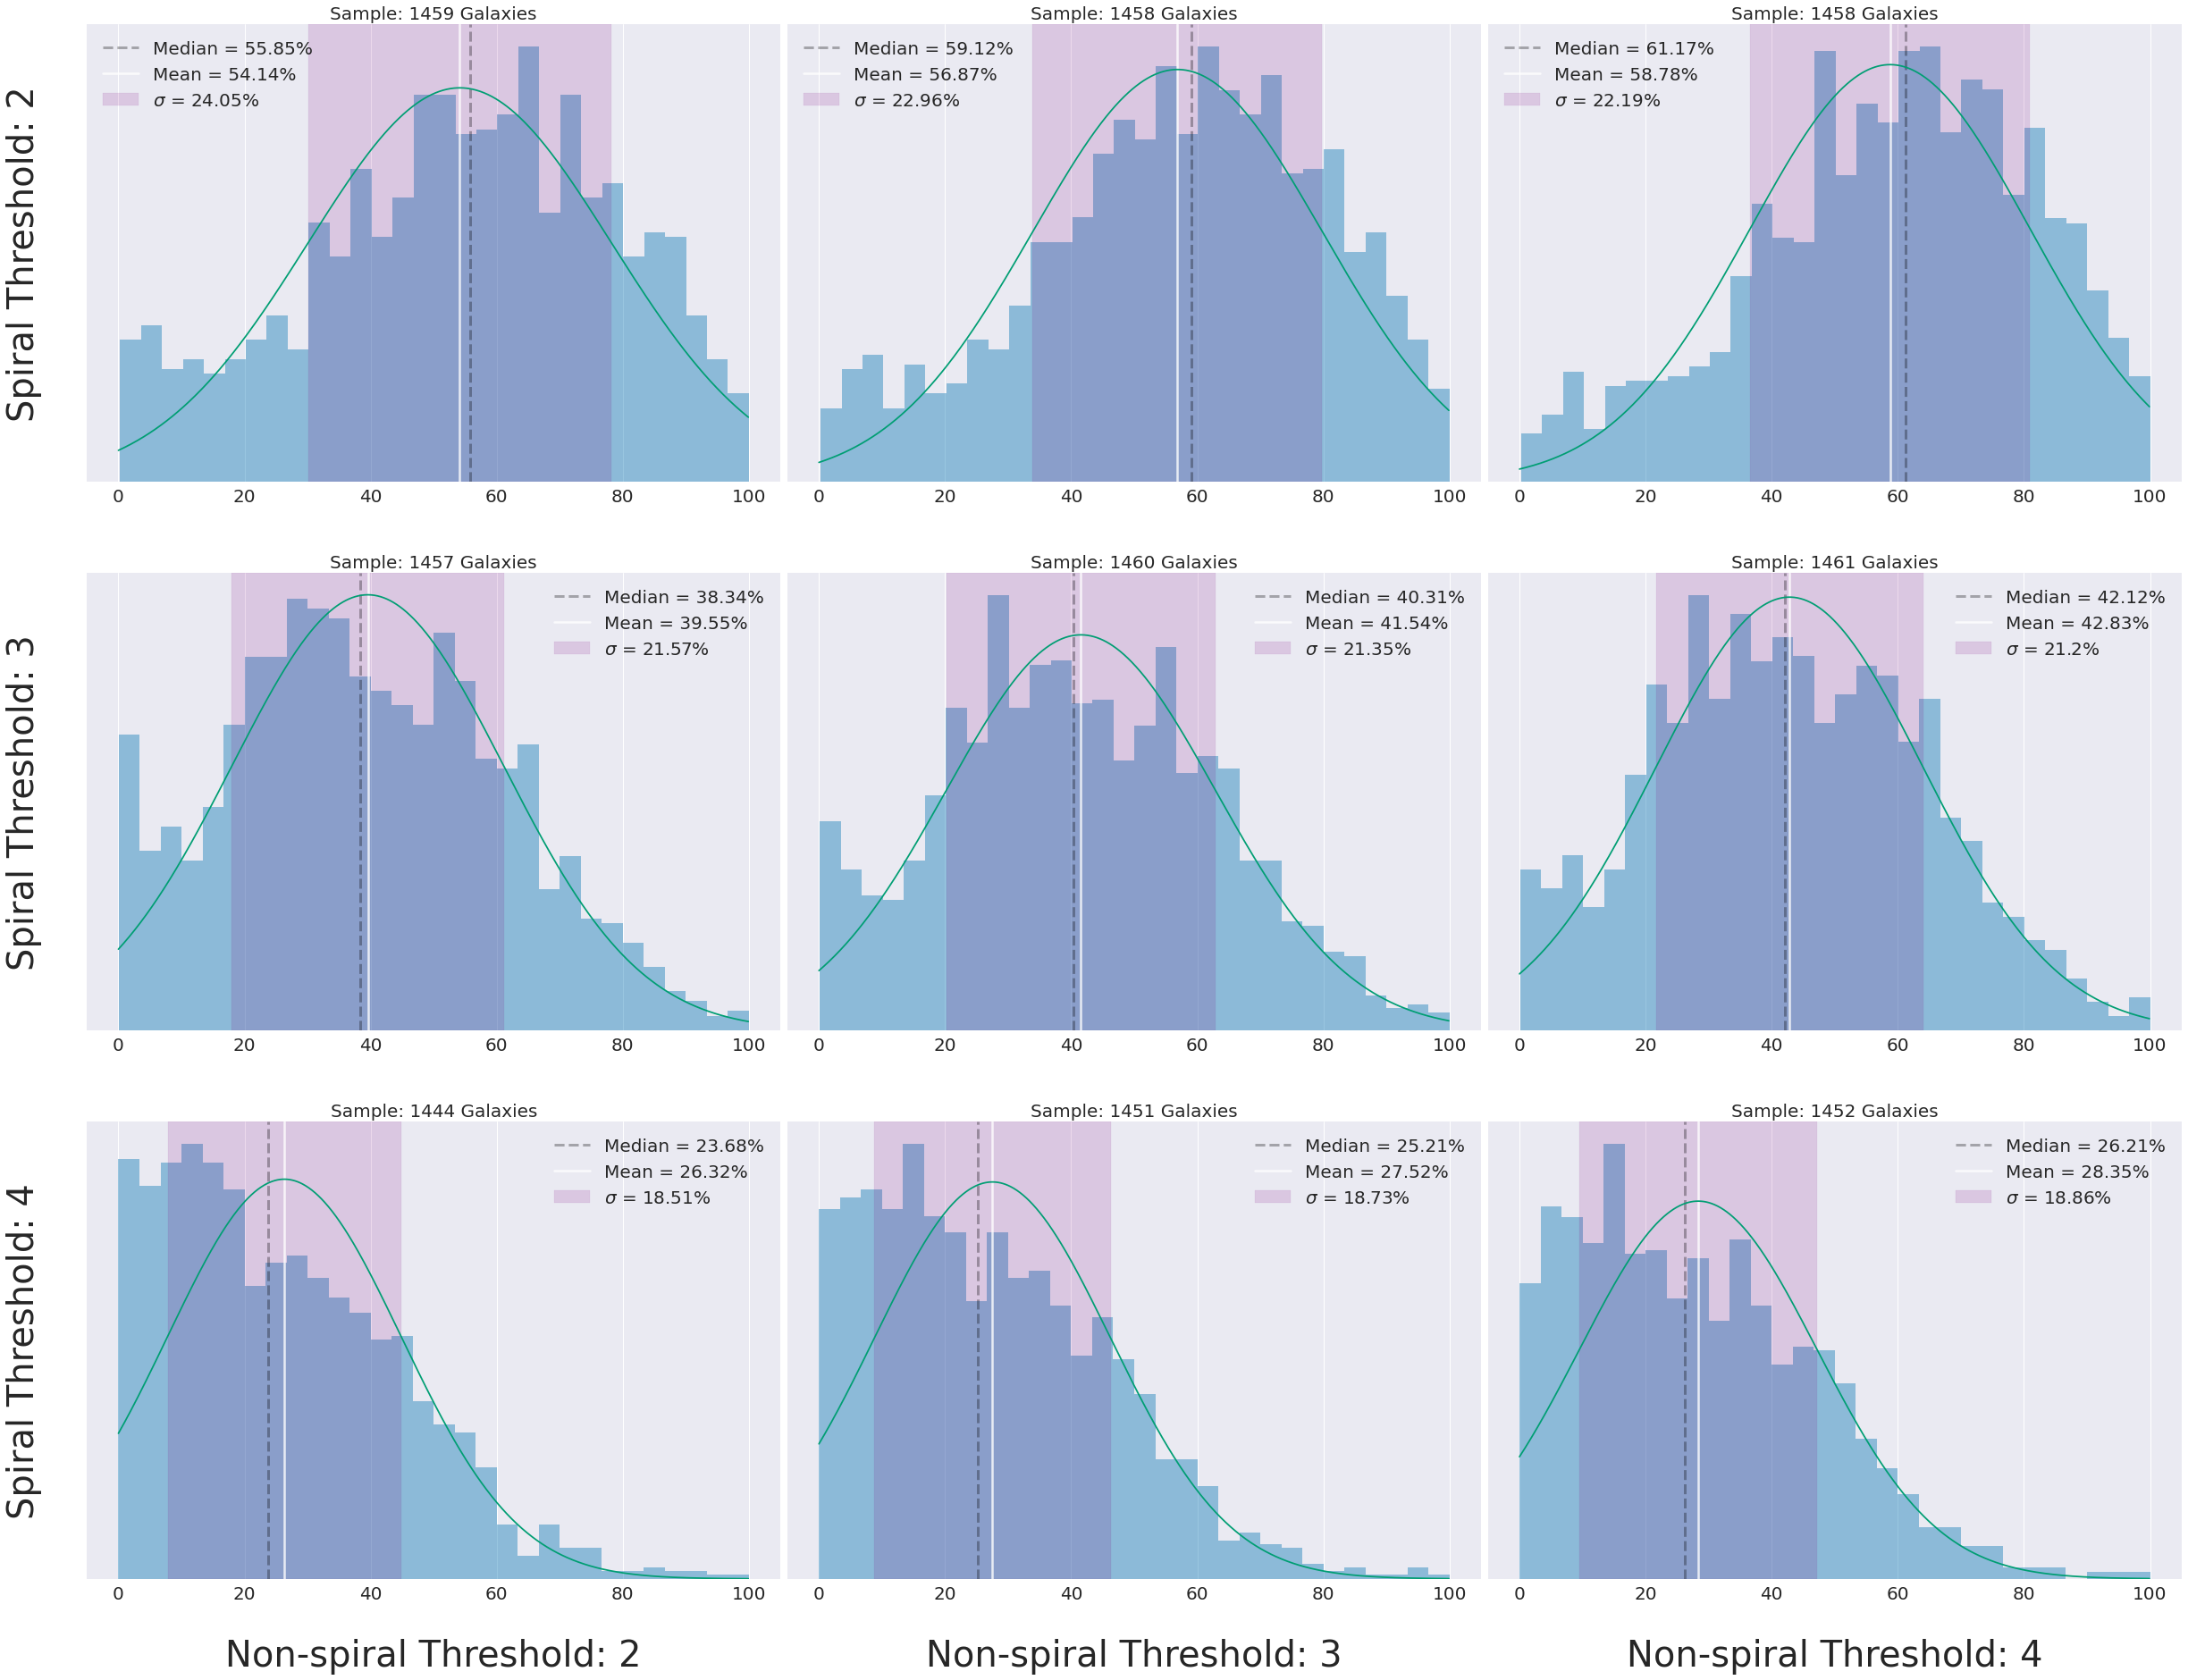

In [9]:
fig, axes = plt.subplots(3, 3, figsize=(42, 32))

for i in range(3):
    for j in range(3):
        Tsp, Tnsp = i + 2, j + 2
        col_name = 'pc_tot_sp_{Tsp}{Tnsp}_sfr'.format(Tsp=Tsp, Tnsp=Tnsp)
        filtered_df = sfr_df
        filtered_df = filtered_df[filtered_df[col_name] <= 100]
        series = filtered_df[col_name]
        n, b, p = axes[i, j].hist(series, bins=30, alpha=0.4, density=True)
        axes[i, j].tick_params(axis="x", labelsize=20)
        axes[i, j].set_yticks([])
        
        mean_series = series.mean()
        median_series = series.median()
        stdv_series = series.std()
        
        axes[i, j].axvline(median_series, linestyle='--', linewidth=3, alpha=0.3, color='k',
                           label='Median = {:.4}%'.format(median_series))
        axes[i, j].axvline(mean_series, linestyle='-', linewidth=2.5, alpha=0.8, color='white',
                           label='Mean = {:.4}%'.format(mean_series))
        axes[i, j].axvspan(mean_series - stdv_series, mean_series + stdv_series, alpha=0.15, color='purple',
                           label='$\sigma$ = {:.4}%'.format(stdv_series))
        x_axis = np.arange(0, 100, 0.1)
        axes[i, j].plot(x_axis, norm.pdf(x_axis, mean_series, stdv_series))
        
        axes[i, j].set_title('Sample: {} Galaxies'.format(len(series)), fontsize=20)
        axes[i, j].legend(fontsize=20)

        
for i in range(3):
    axes[2, i].set_xlabel('Non-spiral Threshold: ' + str(i + 2), size=40, labelpad=40)
    
for i in range(3):
    axes[i, 0].set_ylabel('Spiral Threshold: ' + str(i + 2), size=40, labelpad=50)
    
plt.subplots_adjust(wspace=0.01, hspace=0.2)

### Now for average SFR

In [10]:
for Tsp, Tnsp in thresholds:
    sfr_df['avg_sp_sfr-avg_nsp_sfr/avg_nsp_sfr_{Tsp}{Tnsp}'.format(Tsp=Tsp, Tnsp=Tnsp)] = (sfr_df['avg_sp_{Tsp}{Tnsp}_sfr'.format(Tsp=Tsp, Tnsp=Tnsp)] - sfr_df['avg_nsp_{Tsp}{Tnsp}_sfr'.format(Tsp=Tsp, Tnsp=Tnsp)]) / sfr_df['avg_nsp_{Tsp}{Tnsp}_sfr'.format(Tsp=Tsp, Tnsp=Tnsp)]

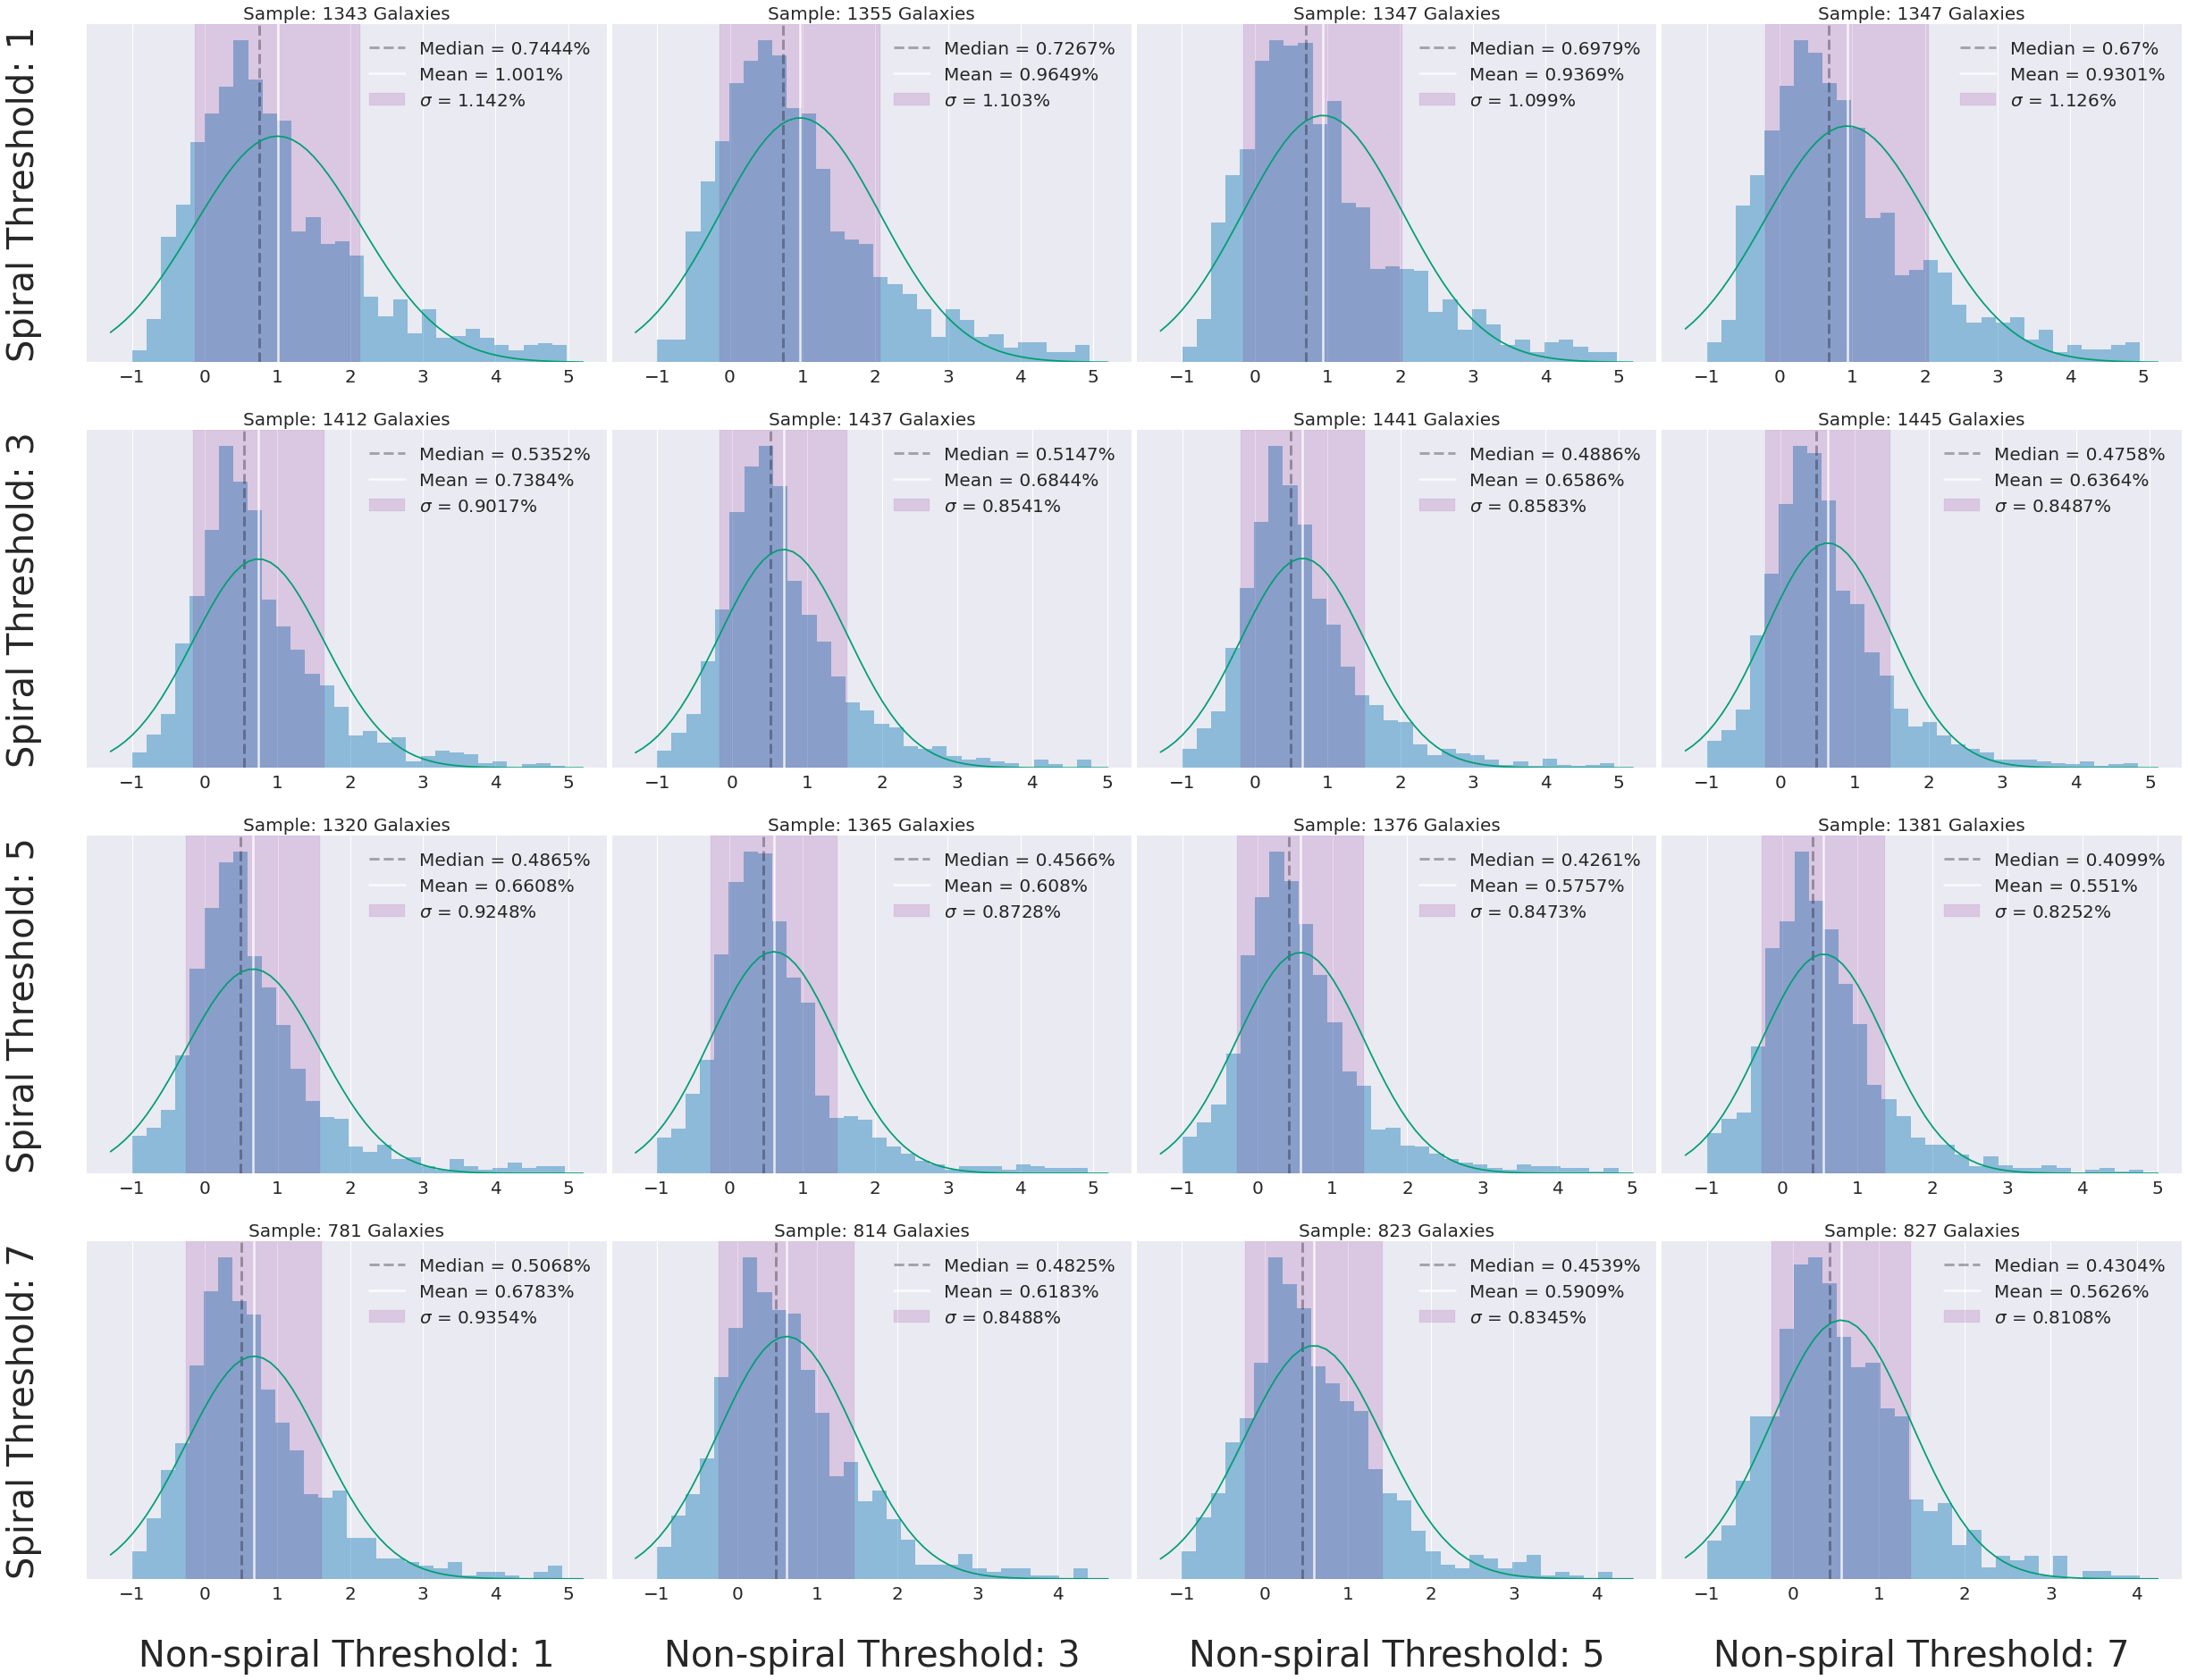

In [11]:
fig, axes = plt.subplots(4, 4, figsize=(42, 32))

for i in range(4):
    for j in range(4):
        Tsp, Tnsp = odd_thresholds[i * 4 + j]
        col_name = 'avg_sp_sfr-avg_nsp_sfr/avg_nsp_sfr_{Tsp}{Tnsp}'.format(Tsp=Tsp, Tnsp=Tnsp)
        filtered_df = sfr_df
        filtered_df = filtered_df[filtered_df[col_name] < 5]
        series = filtered_df[col_name]
        n, b, p = axes[i, j].hist(series, bins=30, alpha=0.4, density=True)
        axes[i, j].tick_params(axis="x", labelsize=20)
        axes[i, j].set_yticks([])
        
        mean_series = series.mean()
        median_series = series.median()
        stdv_series = series.std()
        
        axes[i, j].axvline(median_series, linestyle='--', linewidth=3, alpha=0.3, color='k',
                           label='Median = {:.4}%'.format(median_series))
        axes[i, j].axvline(mean_series, linestyle='-', linewidth=2.5, alpha=0.8, color='white',
                           label='Mean = {:.4}%'.format(mean_series))
        axes[i, j].axvspan(mean_series - stdv_series, mean_series + stdv_series, alpha=0.15, color='purple',
                           label='$\sigma$ = {:.4}%'.format(stdv_series))
        
        x_init, x_fin = axes[i, j].get_xlim()
        x_axis = np.arange(x_init, x_fin, 0.1)
        axes[i, j].plot(x_axis, norm.pdf(x_axis, mean_series, stdv_series))
        
        axes[i, j].set_title('Sample: {} Galaxies'.format(len(series)), fontsize=20)
        axes[i, j].legend(fontsize=20)

        
for i in range(4):
    axes[3, i].set_xlabel('Non-spiral Threshold: ' + str(i * 2 + 1), size=40, labelpad=40)
    
for i in range(4):
    axes[i, 0].set_ylabel('Spiral Threshold: ' + str(i * 2 + 1), size=40, labelpad=50)
    
plt.subplots_adjust(wspace=0.01, hspace=0.2)

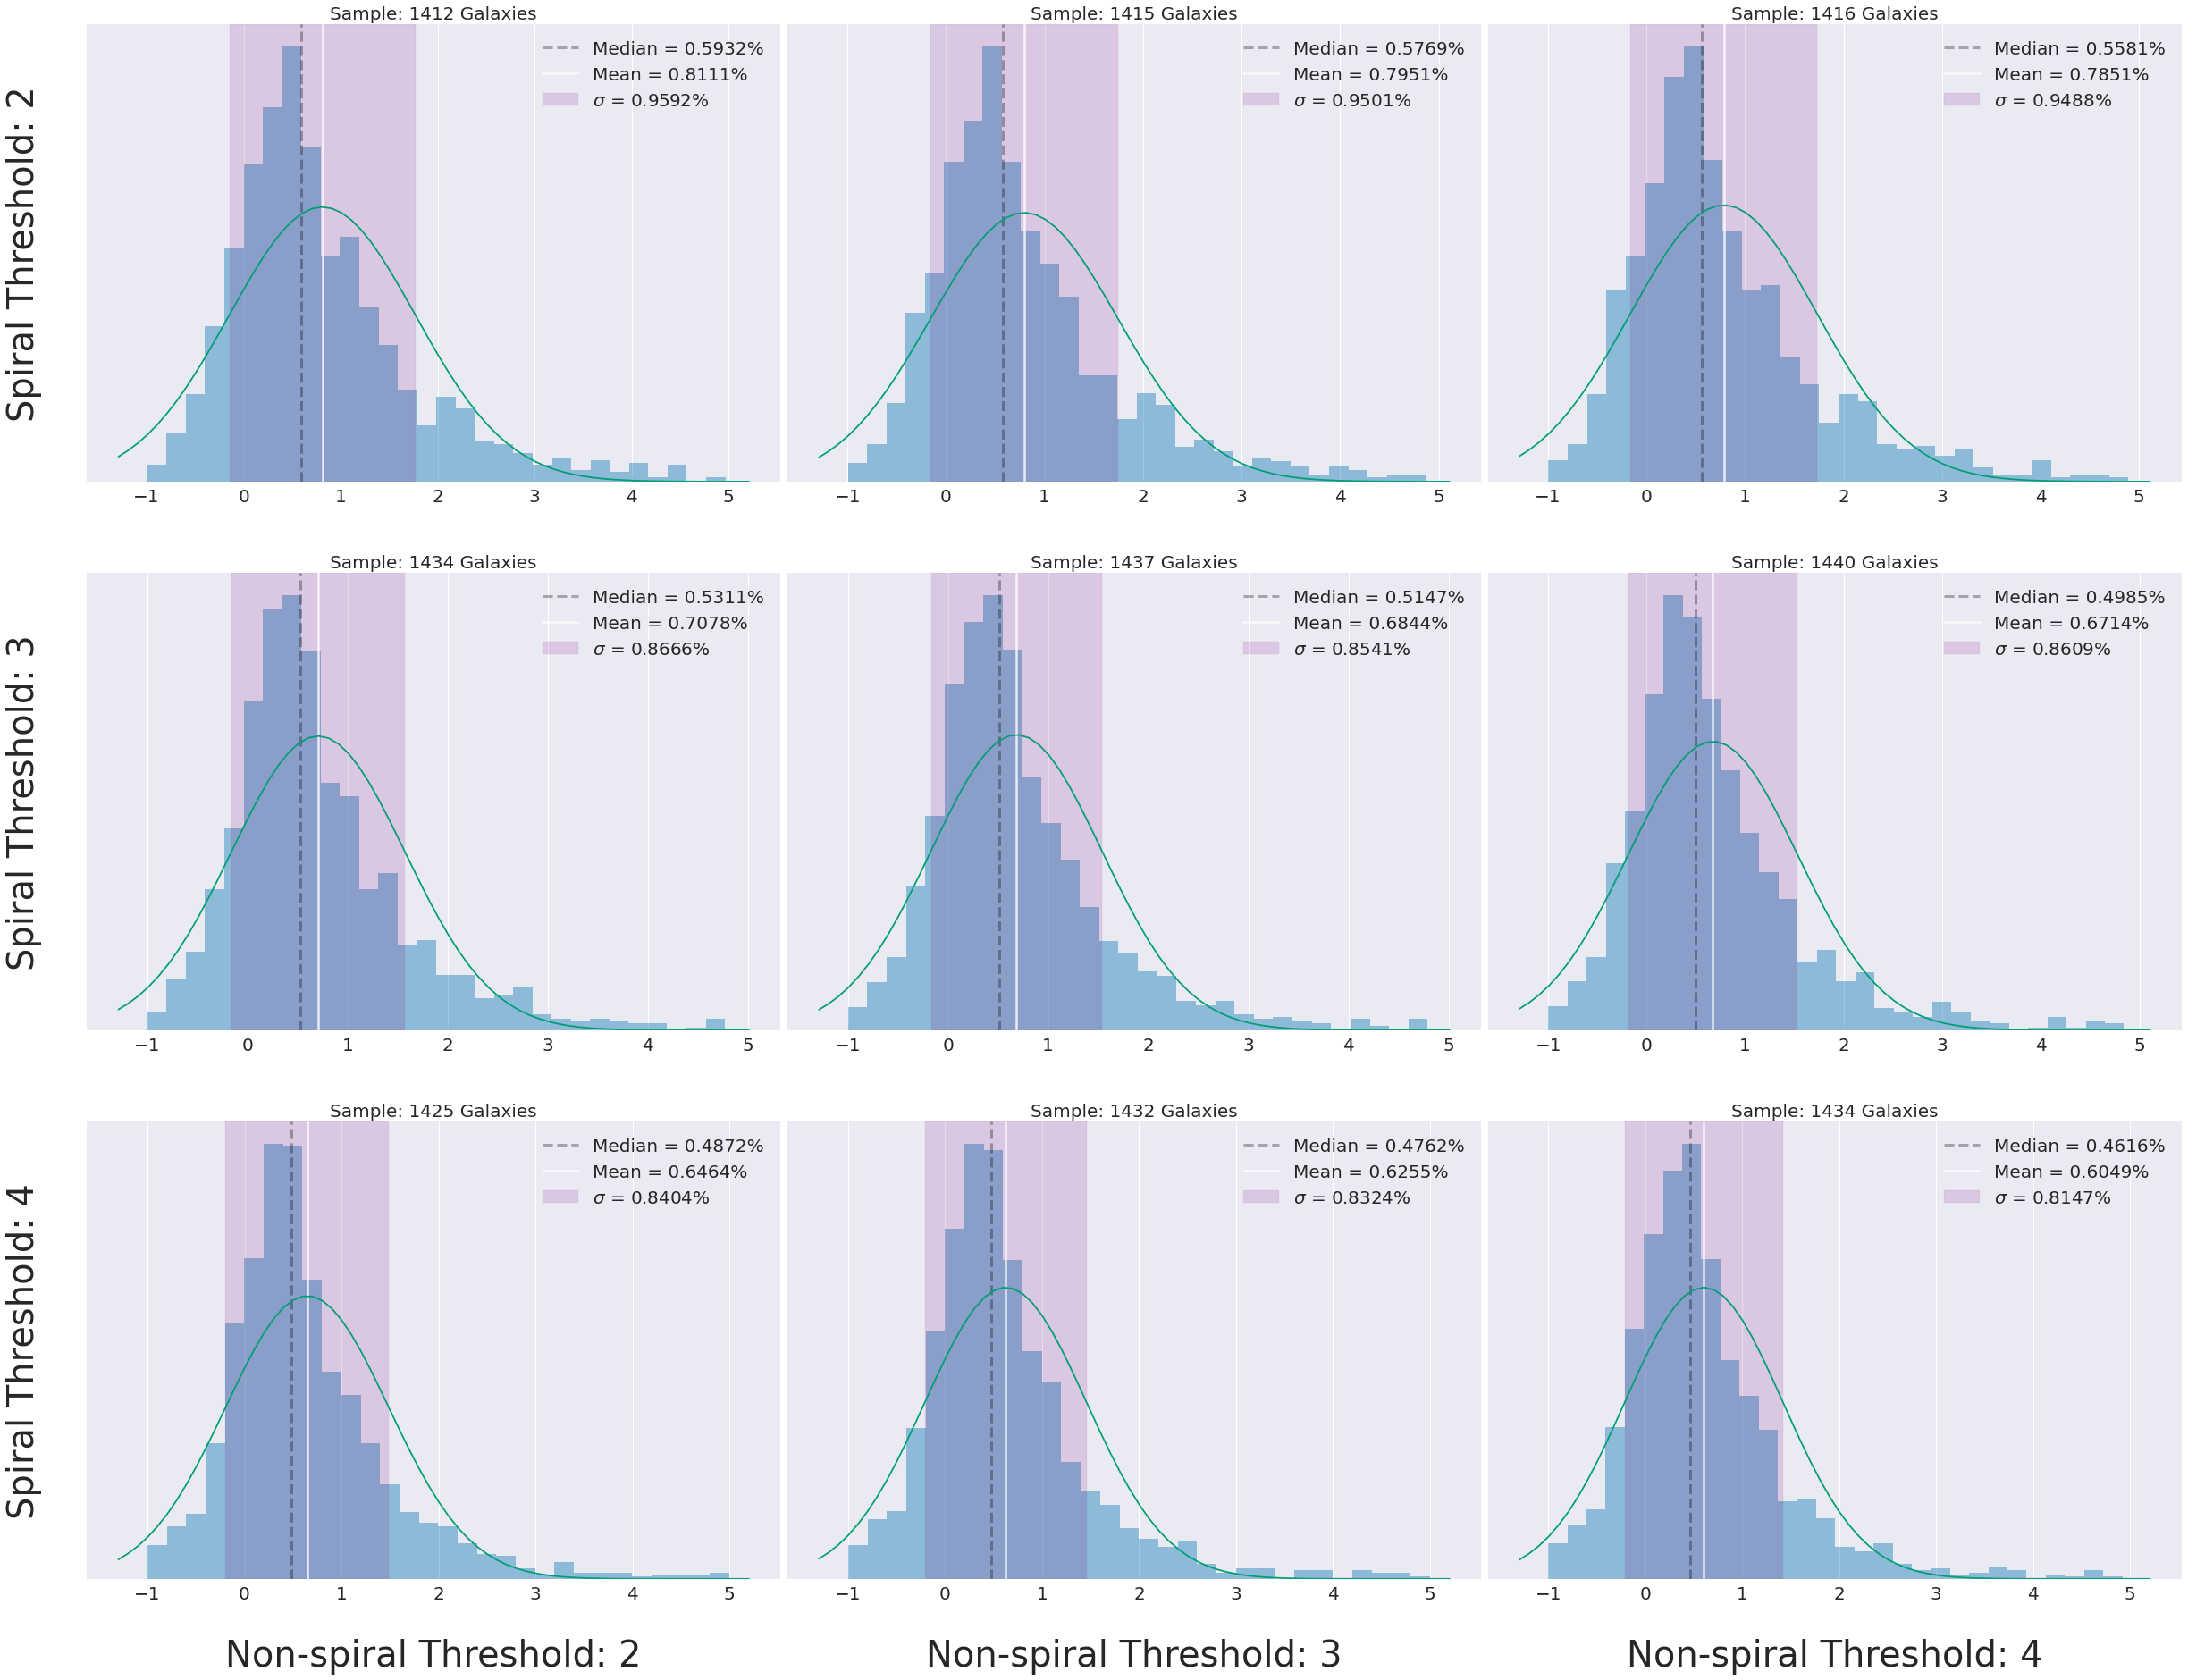

In [12]:
fig, axes = plt.subplots(3, 3, figsize=(42, 32))

for i in range(3):
    for j in range(3):
        Tsp, Tnsp = i + 2, j + 2
        col_name = 'avg_sp_sfr-avg_nsp_sfr/avg_nsp_sfr_{Tsp}{Tnsp}'.format(Tsp=Tsp, Tnsp=Tnsp)
        filtered_df = sfr_df
        filtered_df = filtered_df[filtered_df[col_name] < 5]
        series = filtered_df[col_name]
        n, b, p = axes[i, j].hist(series, bins=30, alpha=0.4, density=True)
        axes[i, j].tick_params(axis="x", labelsize=20)
        axes[i, j].set_yticks([])
        
        mean_series = series.mean()
        median_series = series.median()
        stdv_series = series.std()
        
        axes[i, j].axvline(median_series, linestyle='--', linewidth=3, alpha=0.3, color='k',
                           label='Median = {:.4}%'.format(median_series))
        axes[i, j].axvline(mean_series, linestyle='-', linewidth=2.5, alpha=0.8, color='white',
                           label='Mean = {:.4}%'.format(mean_series))
        axes[i, j].axvspan(mean_series - stdv_series, mean_series + stdv_series, alpha=0.15, color='purple',
                           label='$\sigma$ = {:.4}%'.format(stdv_series))
        
        x_init, x_fin = axes[i, j].get_xlim()
        x_axis = np.arange(x_init, x_fin, 0.1)
        axes[i, j].plot(x_axis, norm.pdf(x_axis, mean_series, stdv_series))
        
        axes[i, j].set_title('Sample: {} Galaxies'.format(len(series)), fontsize=20)
        axes[i, j].legend(fontsize=20)

        
for i in range(3):
    axes[2, i].set_xlabel('Non-spiral Threshold: ' + str(i + 2), size=40, labelpad=40)
    
for i in range(3):
    axes[i, 0].set_ylabel('Spiral Threshold: ' + str(i + 2), size=40, labelpad=50)
    
plt.subplots_adjust(wspace=0.01, hspace=0.2)